In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
dirty=pd.read_csv('data/Sea_Turtle_Rescue_data/dirty_fixed.csv')
clean=pd.read_csv('data/Sea_Turtle_Rescue_data/cleaned_data_fixed.csv')
test=pd.read_csv('data/Sea_Turtle_Rescue_data/test_data.csv')
submission=pd.read_csv('data/Sea_Turtle_Rescue_data/submission_example.csv')
dirty.head()

,Rescue_ID,Date_Caught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,ReleaseSite,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,Date_Release,Release_Admiss_Notes,SpecialRemarks,PCVNumber,Expenditure
0,1998_RE_0001,4/14/1998,researcher_12,site_110,creek,net,fisher_619,site_58,species_1,site_80,...,58.5,NaN,Unknown,NaN,Released,4/14/1998,NaN,NaN,NaN,NaN
1,1998_RE_0002,7/7/1998,researcher_4,not_recorded,ocean,longline,fisher_522,site_22,species_1,not_recorded,...,37.0,NaN,NaN,1B-1LLS,NaN,NaN,NaN,NaN,NaN,NaN
2,1998_RE_0003,8/3/1998,NaN,site_12,creek,net,fisher_1254,not_recorded,species_1,site_109,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998_RE_0004,8/7/1998,researcher_12,site_110,creek,net,fisher_360,not_recorded,species_2,site_113,...,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998_RE_0005,9/25/1998,researcher_17,not_recorded,creek,collected floater,fisher_865,site_8,species_3,site_109,...,63.5,NaN,NaN,Bs on C+ old panga wounds,NaN,NaN,Found trapped in mangroves,NaN,NaN,NaN


In [33]:
clean.head()

,Rescue_ID,Date_Caught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,ReleaseSite,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,Date_Release,Release_Admiss_Notes,SpecialRemarks,PCVNumber,Expenditure
0,1998_RE_0001,4/17/1998,researcher_19,site_110,creek,net,fisher_619,site_58,species_1,site_80,...,58.42,NaN,Unknown,NaN,Released,4/17/1998,NaN,NaN,NaN,NaN
1,1998_RE_0002,7/7/1998,researcher_15,site_15,creek,longline,fisher_522,site_22,species_1,not_recorded,...,36.83,NaN,Unknown,1B-1LLS,NaN,NaN,NaN,NaN,NaN,NaN
2,1998_RE_0003,8/3/1998,not_recorded,site_12,creek,not_recorded,fisher_1254,not_recorded,species_1,site_109,...,33.00,NaN,Unknown,NaN,Released,8/3/1998,NaN,NaN,NaN,NaN
3,1998_RE_0004,8/7/1998,researcher_19,site_110,creek,not_recorded,fisher_360,not_recorded,species_2,site_108,...,31.75,NaN,Unknown,There was pillings on carapace.,Released,8/7/1998,NaN,NaN,NaN,NaN
4,1998_RE_0005,9/25/1998,researcher_17,site_8,creek,collected floater,fisher_865,site_8,species_3,site_121,...,63.50,NaN,Unknown,Bs on C+ old panga wounds,Released,9/25/1998,Found trapped in mangroves,NaN,NaN,NaN


### Build the train and test data 

#### train

In [155]:
columns=[]
res=[]
before=[]
after=[]
year=[]
column_name=[]
for rescue_id in clean['Rescue_ID']:
    columns.extend([rescue_id+" x "+c for c in  clean.columns[1:]])
    year.extend([rescue_id[:4]]*25)
    column_name.extend([c for c in  clean.columns[1:]])
for i in range(clean.shape[0]):
    for j in range(1,clean.shape[1]):
        before.append(dirty.iloc[i,j])
        after.append(clean.iloc[i,j])
        res.append(1-int(dirty.iloc[i,j]==clean.iloc[i,j]))
        if(pd.isnull(dirty.iloc[i,j]) and pd.isnull(clean.iloc[i,j])):
            res[-1]=0
                
train_df=pd.DataFrame.from_dict({'ID':columns,'before':before,'after':after,'column_name':column_name,'year':year,'error':res})
train_df.head()

,ID,before,after,column_name,year,error
0,1998_RE_0001 x Date_Caught,4/14/1998,4/17/1998,Date_Caught,1998,1
1,1998_RE_0001 x Researcher,researcher_12,researcher_19,Researcher,1998,1
2,1998_RE_0001 x CaptureSite,site_110,site_110,CaptureSite,1998,0
3,1998_RE_0001 x ForagingGround,creek,creek,ForagingGround,1998,0
4,1998_RE_0001 x CaptureMethod,net,net,CaptureMethod,1998,0


#### test

In [156]:
columns=[]
res=[]
before=[]
year=[]
column_name=[]
for rescue_id in test['Rescue_ID']:
    columns.extend([rescue_id+" x "+c for c in  test.columns[1:]])
    year.extend([rescue_id[:4]]*25)
    column_name.extend([c for c in  clean.columns[1:]])
res=[0]*(len(columns))
for i in range(test.shape[0]):
    for j in range(1,test.shape[1]):
        before.append(test.iloc[i,j])
        
test_df=pd.DataFrame.from_dict({'ID':columns,'before':before,'column_name':column_name,'year':year,'error':res})
test_df.head()

,ID,before,column_name,year,error
0,2011_RE_0001 x Date_Caught,1/1/2011,Date_Caught,2011,0
1,2011_RE_0001 x Researcher,researcher_4,Researcher,2011,0
2,2011_RE_0001 x CaptureSite,site_38,CaptureSite,2011,0
3,2011_RE_0001 x ForagingGround,ocean,ForagingGround,2011,0
4,2011_RE_0001 x CaptureMethod,net,CaptureMethod,2011,0


### Data exploration 

### the distribution of the data by year 

/home/ubuntu/anaconda3/envs/hamza/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


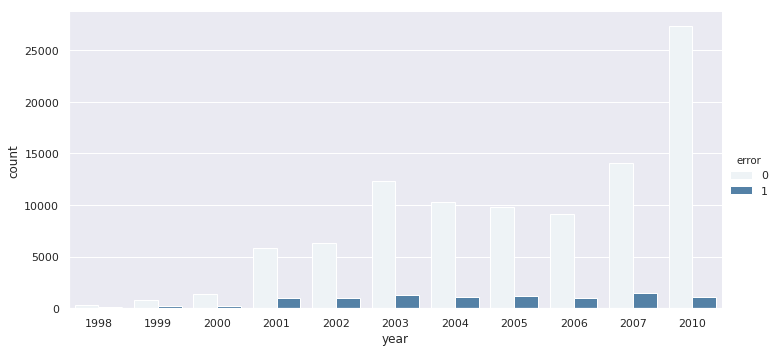

In [157]:
sns.factorplot("year", data=train_df, aspect=2,  hue='error',
                       kind="count", color='steelblue')

#### almost equal probab of error 

/home/ubuntu/anaconda3/envs/hamza/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


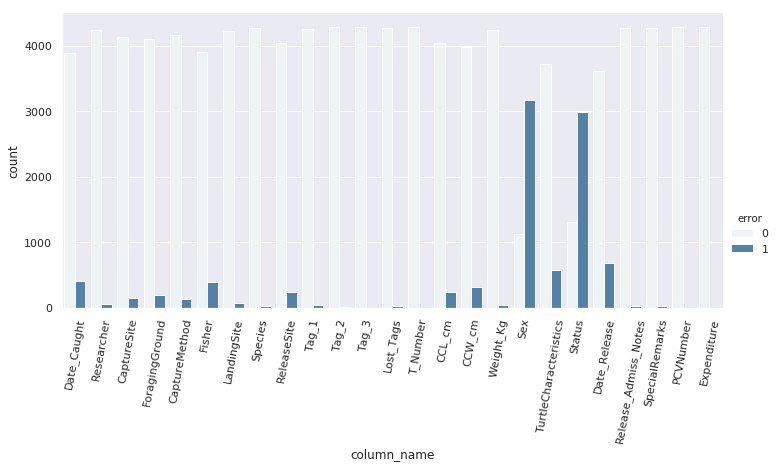

In [158]:
g=sns.factorplot("column_name", data=train_df, aspect=2,  hue='error',
                       kind="count", color='steelblue')
g.set_xticklabels(rotation=80)


In [159]:
train_df.dtypes

ID             object
before         object
after          object
column_name    object
year           object
error           int64
dtype: object

In [132]:
train_df.isnull().sum()

ID                 0
before         46095
after          39212
column_name        0
year               0
error              0
dtype: int64

In [106]:
clean.columns

Index(['Rescue_ID', 'Date_Caught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'ReleaseSite', 'Tag_1', 'Tag_2', 'Tag_3', 'Lost_Tags', 'T_Number',
       'CCL_cm', 'CCW_cm', 'Weight_Kg', 'Sex', 'TurtleCharacteristics',
       'Status', 'Date_Release', 'Release_Admiss_Notes', 'SpecialRemarks',
       'PCVNumber', 'Expenditure'],
      dtype='object')

### Dummy submit again 

In [91]:
test_df.head()

,ID,before,column_name,year,error
0,2011_RE_0001 x Date_Caught,1/1/2011,Date_Caught,2011,0
1,2011_RE_0001 x Researcher,researcher_4,Researcher,2011,0
2,2011_RE_0001 x CaptureSite,site_38,CaptureSite,2011,0
3,2011_RE_0001 x ForagingGround,ocean,ForagingGround,2011,0
4,2011_RE_0001 x CaptureMethod,net,CaptureMethod,2011,0


In [162]:
submit=test_df.copy()
submit['error']=0
submit.loc[submit['column_name'] =='Sex','error']=1
submit.drop(columns=['column_name','before','year']).to_csv('dummy_submit.csv',header=True,index=False)